# 1. Modules

In [1]:
# Import necessary modules
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from __future__ import print_function

import tautils as tu
import jwst_targloc as jtl

(tautils): TA Utilities Version 1.4.5 loaded!
(jwst_targloc): JWST Target Locate Utilities Version 1.0.1 loaded!


In [2]:
%matplotlib inline

# 2. Functions

See jwst_targloc.py

In [3]:
def checkbox_2D(image, checkbox, debug=False):
    """
    Find the course location of an input psf by finding the 
    brightest checkbox.
    
    This function uses a 2 dimensional image as input, and
    finds the the brightest checkbox of given size in the
    image.
    
    Keyword arguments:
    image    -- 2 dimensional psf image
    checkbox -- A sliding partial filter that equal the sum
                of values in an n x n region centered on the
                current pixel, where n is an odd integer.
    
    Output(s):
    checkbox_ctr -- A tuple containing the brightest checkbox 
                    location.
    checkbox_hfw -- A tuple containing the checkbox halfwidth.
    
    Example usage:
    
        &gt;&gt; cb_cen, cb_hw = checkbox_2D(psf, 5)
        
        Find the location of the brightest checkbox, given a
        checkbox size of 5. Returns the brightest checkbox 
        center and halfwidths.
    """
    
    # Calculate the checkbox half-width
    chw = (checkbox - 1) / 2
    
    # Calculate the image size
    xsize, ysize = image.shape[1], image.shape[0]
    
    # Calculate the x and y widths of checkbox region
    xwidth, ywidth = xsize - checkbox + 1, ysize - checkbox + 1
    
    # If the checkbox size is not equal to both the X and Y sizes, 
    # find the pixel with the brightest checkbox
    if checkbox != xsize and checkbox != ysize:
        xpeak = 0
        ypeak = 0
        sumpeak = 0
        for ii in xrange(xsize - checkbox):
            for jj in xrange(ysize - checkbox):
                t = np.sum(image[jj:jj+checkbox, ii:ii+checkbox])
                if t &gt; sumpeak:
                    xpeak = ii + chw + 1
                    ypeak = jj + chw + 1
                    sumpeak = t
        
        print('(checkbox_2D): Checkbox not equal to both x/ysize.')
        print()        

    
    # If the checkbox size is equal to both the X and Y sizes
    if checkbox == xsize and checkbox == ysize:
        xpeak = xsize / 2
        ypeak = ysize / 2
        sumpeak = np.sum(image, axis=None)
        
        print('(checkbox_2D): Checkbox equal to x/ysize.')
        print()
        
    # Print calculated checkbox center, and sum within checkbox centroid

    # Find the checkbox region half-width in x and y
    xhw = xwidth / 2
    yhw = ywidth / 2
        
    if xpeak &lt; xhw or xpeak &gt; xsize - xhw or ypeak &lt; yhw or ypeak &gt; ysize - yhw:
        print('(checkbox_2D): WARNING - Peak too close to edge of image.')
        print()
        
#    NOTE: Use this section of the input image is a subset of a larger image
#          Not currently needed for this analysis
#    # Determine the center of the brightest checkbox, in extracted
#    # image coordinates
#    xpeak = xpeak + xhw
#    ypeak = ypeak + yhw

    # Debug messages
    if debug:
        print('(checkbox_2D): chw = ', chw)
        print('(checkbox_2D): xsize, ysize = {}, {}'.format(xsize, ysize))
        print('(checkbox_2D): xwidth, ywidth = {}, {}'.format(xwidth, ywidth))
        print('(checkbox_2D): xpeak, ypeak = {}, {}'.format(xpeak, ypeak))
        print('(checkbox_2D): sumpeak = ', sumpeak)
        print('(checkbox_2D): xhw, yhw = {}, {}'.format(xhw, yhw))
        print()
        
    checkbox_ctr = np.array((xpeak, ypeak))
    checkbox_hfw = np.array((xhw, yhw))

    return checkbox_ctr, checkbox_hfw

In [4]:
def checkbox_1D(image, checkbox, debug=False):
    """
    Find the course location of an flattened input psf by 
    finding the brightest checkbox.
    
    This function uses an image as input, flattens it into a 
    vector and finds the the brightest checkbox of given size 
    in the image.
    
    Keyword arguments:
    image    -- 2 dimensional psf image
    checkbox -- A sliding partial filter that equal the sum
                of values in an n x n region centered on the
                current pixel, where n is an odd integer.
    
    Output(s):
    xpeak -- The brightest checkbox location.
    xhw   -- Checkbox halfwidth.

    
    Example usage:
    
        &gt;&gt; cb_center, cb_hw = checkbox_1D(vector, 5)
        
        Find the location of the brightest checkbox in a vector, 
        given a checkbox size of 5. Returns the brightest checkbox 
        center and halfwidth.
    """
    
    # Collapse input image, currently onto X axis
    # Reshape to reflect collapse onto x axis
    vector = np.sum(image, axis=0)
    print('(checkbox_1D): Image collapsed into 1D vector.')
    print()
    
    # Calculate the checkbox half-width
    chw = (checkbox - 1) / 2

    
    # Calculate the image size
    xsize, ysize = image.shape[1], image.shape[0]
    
    # Calculate the x and y widths of checkbox region
    xwidth = xsize - checkbox + 1

    # If the checkbox size is not equal to both the X and Y sizes, 
    # find the pixel with the brightest checkbox
    if checkbox != xsize and checkbox != ysize:
        xpeak = 0
        ypeak = 1
        sumpeak = 0
        for ii in xrange(xsize - checkbox):
            t = np.sum(vector[ii:ii+checkbox])
            if t &gt; sumpeak:
                xpeak = ii + 1
                sumpeak = t

        print('(checkbox_1D): Checkbox not equal to xsize.')
                
                
    # If the checkbox size is equal to both the X and Y sizes
    if checkbox == xsize:
        xpeak = xsize / 2
        sumpeak = np.sum(vector, axis=None)
        
        print('(checkbox_1D): Checkbox equal to xsize.')
        
    # Print checkbox center and peak around centroid region

    # Find the checkbox region half-width in x and y
    xhw = xwidth / 2
        
    if xpeak &lt; xhw or xpeak &gt; xsize - xhw:
        print('(checkbox_1D): WARNING - Peak too close to edge of image.')
        
    
    # Debug messages
    if debug:
        print('(checkbox_1D): chw = ', chw)
        print('(checkbox_1D): xhw = ', xhw)
        print('(checkbox_1D): xsize = ', xsize)
        print('(checkbox_1D): xwidth = ', xwidth)
        print('(checkbox_1D): xpeak = ', xpeak)
        print('(checkbox_1D): sumpeak = ', sumpeak)
        print()    
        
#    NOTE: Use this section of the input image is a subset of a larger image
#          Not currently needed for this analysis
#    # Determine the center of the brightest checkbox, in extracted
#    # image coordinates
#    xpeak = xpeak + xhw
    
    return xpeak, xhw

In [5]:
def centroid_2D(image, checkbox_center, checkbox_halfwidth, max_iter=0, threshold=0, debug=False):
    """
    Fine location of the target by calculating the centroid for 
    the region centered on the brightest checkbox.
    
    Performs the centroid calculation on the checkbox region 
    calculated using the function checkbox_2D().
    
    Keyword arguments:
    image              -- 2 dimensional psf image
    checkbox_center    -- The location of the brightest checkox, 
                          in x and y, in the input image. (pix)
    checkbox_halfwidth -- The halfwidths in both x and y of the 
                          checkbox from centroid_2D(). (pix)
    max_iter           -- Max number of iterations for fine 
                          centroiding. Ignored if convergence is
                          reached beforehand.
    threshold          -- Threshold for successful convergence.
    
    
    Output(s):
    centroid  -- Tuple containing the location of the target, 
                 in the format [x, y].
    c_cum     -- The calculated flux sum within the checkbox 
                 region.
    
    Example usage:
    
        &gt;&gt; cb_centroid, cb_sum = centroid_2D(psf, cb_cen, cb_hw, 
                        max_iter=5, threshold=0.0001, debug=True)
        
        Find the fine centroid location of the target in psf, given
        both the checkbox center and halfwidths. Do a fine centroid 
        iteration of a maximum of 5, unless an threshold of 0.0001 
        is reached first
    """
    
    # First calculate centroid to use for the first iteration
    c_sum = 0
    xsum = 0
    ysum = 0
    
    convergence_flag = 'N/A'
    
    # Unpack the checkbox_center and checkbox_halfwidth into 
    # their appropriate variables
    xpeak, ypeak = checkbox_center
    xhw, yhw = checkbox_halfwidth    
    
    for ii in xrange(xpeak - xhw - 1, xpeak + xhw - 1):
        for jj in xrange(ypeak - yhw - 1, ypeak + yhw - 1):
            xloc = ii + 1
            yloc = jj + 1
            c_sum = c_sum + image[jj, ii]
            xsum = xsum + xloc * image[jj, ii]
            ysum = ysum + yloc * image[jj, ii]
            
    if debug:
        # Initial sum calculation (before iterations)
        print('(centroid_2D): Init. Sum (before iterations) = ', c_sum)
        print()

    if c_sum == 0:
        print('(centroid_2D): ERROR - divide by zero.')
        print()
        exit
    else:
        xcen = xsum / c_sum
        ycen = ysum / c_sum
            
    # Iteratively calculate centroid until solution converges, using 
    # neighboring pixels to apply weighting...
    old_xcen = xcen
    old_ycen = ycen
    num_iter = 0
    
    for kk in xrange(max_iter):
        num_iter += 1
        c_sum = 0
        xsum = 0
        ysum = 0
        
        # Set up x and y centroid scanning ranges
        x_range = np.array((np.floor(old_xcen - xhw) - 1, np.ceil(old_xcen + xhw) - 1))
        y_range = np.array((np.floor(old_ycen - yhw) - 1, np.ceil(old_ycen + yhw) - 1))
                
        for ii in xrange(np.int(x_range[0]), np.int(x_range[1])):
            for jj in xrange(np.int(y_range[0]), np.int(y_range[1])):
                
                # Initalize weights to zero
                xweight = 0
                yweight = 0
                
                # Adjust weights given distance from current centroid
                xoff = np.abs((ii + 1) - old_xcen)
                yoff = np.abs((jj + 1) - old_ycen)
                
                # If within the original centroid box, set weight to 1
                # for both x and y.
                # If on the border, the scale weight
                if xoff &lt;= xhw:
                    xweight = 1
                elif xoff &gt; xhw and xoff &lt; (xhw + 1):
                    xweight = xhw + 1 - xoff
                    
                if yoff &lt;= yhw:
                    yweight = 1
                elif yoff &gt; yhw and yoff &lt; (yhw + 1):
                    yweight = yhw + 1 - yoff
                    
                # Compute cummulative weight
                weight = xweight * yweight
                
                # Calculate centroid
                xloc = ii + 1
                yloc = jj + 1
                
                c_sum = c_sum + image[jj, ii] * weight
                xsum = xsum + xloc * image[jj, ii] * weight
                ysum = ysum + yloc * image[jj, ii] * weight
                
        if c_sum == 0:
            print('(centroid_2D): ERROR - Divide by zero.')
            print()
        else:
            xcen = xsum / c_sum
            ycen = ysum / c_sum
                    
            # Check for convergence
            if np.abs(xcen - old_xcen) &lt;= threshold and np.abs(ycen - old_ycen) &lt;= threshold:
                convergence_flag = 'Success'
                break
            elif kk == max_iter:
                convergence_flag = 'Fail'
                break
            else:
                old_xcen = xcen
                old_ycen = ycen
    
    # Debug messages
    if debug:
        print('(centroid_2D): xpeak, ypeak = {}, {}'.format(xpeak, ypeak))
        print('(centroid_2D): xhw, yhw = {}, {}'.format(xhw, yhw))
        print('(centroid_2D): xcen, ycen = {}, {} '.format(xcen, ycen))        
        print()
        
                        
    print('(centroid_2D): Centroid = [{}, {}] for num_iter = {}.'.format(xcen-1, ycen-1, num_iter))
    print('(centroid_2D): Converged? ', convergence_flag)
    print()
          
    # -1 on both axes, as Python is 0 major    
    centroid = np.array((xcen-1, ycen-1))
    return centroid, c_sum

In [6]:
def find2D_higher_moments(image, centroid, halfwidths, c_sum):
    """
    Calculate the higher moments of the object in the image.
    
    Find the normalized squared and cubed moments with reference 
    to an origin at the centroid, using the centroid and and sum 
    values calculatated previously.
    
    Keyword arguments:
    image      -- 2 dimensional psf image
    centroid   -- Tuple containing centroid of the object in 
                  image ([x, y] in pixels).
    halfwidths -- The halfwidths in both x and y of the 
                  checkbox from centroid_2D(). (pix)
    c_sum      -- The calculated flux sum within the checkbox 
                 region.
                 
    
    Output(s):
    x_mom, y_mom -- Tuples containing the x and y higher moments 
                    (normalized squared and cubed).
    
    Example usage:
    
        &gt;&gt; x_mom, y_mom = find2D_higher_moments(psf, cb_centroid, 
                          cb_hw, cb_sum)
        
        Find the second and third moments of psf, given the 
        centroid, checkbox halfwidths, and calculated sum.
    """
    
    # Unpack centroid to seperate values
    xcen, ycen = np.floor(centroid)
    xhw, yhw = halfwidths
    
    xmoment2 = 0
    xmoment3 = 0
    ymoment2 = 0
    ymoment3 = 0
        
    # Set up x and y centroid scanning ranges
    x_range = np.array((np.floor(xcen - xhw) - 1, np.ceil(xcen + xhw) - 1))
    y_range = np.array((np.floor(ycen - yhw) - 1, np.ceil(ycen + yhw) - 1))
    
    
    for ii in xrange(np.int(x_range[0]), np.int(x_range[1])):
        for jj in xrange(np.int(y_range[0]), np.int(y_range[1])):
            
            xloc = ii - np.floor(xcen)
            yloc = jj - np.floor(ycen)
            
            xweight = 0
            yweight = 0
            
            xoff = np.abs(ii - xcen)
            yoff = np.abs(jj - ycen)
            
            if xoff &lt;= xhw:
                xweight = 1
            elif xoff &gt; xhw and xoff &lt; (xhw + 1):
                xweight = xhw + 1 - xoff
                
            if yoff &lt;= yhw:
                yweight = 1
            elif yoff &gt; yhw and yoff &lt; (yhw + 1):
                yweight = yhw + 1 - yoff
                
            weight = xweight * yweight
            
            xmoment2 = xmoment2 + xloc**2 * image[jj, ii] * weight
            xmoment3 = xmoment3 + xloc**3 * image[jj, ii] * weight
            ymoment2 = ymoment2 + yloc**2 * image[jj, ii] * weight
            ymoment3 = ymoment3 + yloc**3 * image[jj, ii] * weight
            
    xmoment2 = xmoment2 / c_sum
    xmoment3 = xmoment3 / c_sum
    ymoment2 = ymoment2 / c_sum
    ymoment3 = ymoment3 / c_sum

    # Pack the x and y moments to return to main program
    x_moment = np.array((xmoment2, xmoment3))
    y_moment = np.array((ymoment2, ymoment3))
    
    return x_moment, y_moment   

In [7]:
def centroid_1D(image, xpeak, xhw, debug=False):
    """
    Fine location of the target by calculating the centroid for 
    the region centered on the brightest checkbox.
    
    Performs the centroid calculation on the checkbox region 
    calculated using the function checkbox_1D().
    
    Keyword arguments:
    image -- 2 dimensional psf image
    xpeak -- The location of the brightest checkox in the 
             flattened vector.
    xhw   -- The halfwidth of the checkbox region calculated in
             checkbox_1D.
             
    
    Output(s):
    x_cen -- Target centroid location.
    c_cum -- The calculated flux sum within the checkbox 
             region.
    
    Example usage:
    
        &gt;&gt; cb_centroid, cb_sum = centroid_1D(psf, cb_center, 
                                 cb_hw)
        
        Find the vector centroid given the checkbox center and 
        halfwidth.
    """
    
    # Collapse input image unto x axis
    vector = np.sum(image, axis=0)
    
    c_sum = 0.0
    xcen = 0.0
        
    for ii in xrange(xpeak - xhw - 1, xpeak + xhw - 1):
        c_sum = c_sum + vector[ii]
        xloc = ii + 1
        xcen = xcen + xloc * vector[ii]
    
    print('(centroid_1D): Sum = ', c_sum)
    
    
    if c_sum == 0:
        print('(centroid_1D): ERROR - divide by zero')
    else:
        xcen = xcen / c_sum
        
    print('(centroid_1D): Centroid = ', xcen-1)
        
    # -1 on both axes, as Python is 0 major    
    return xcen-1, c_sum  

In [8]:
def find1D_higher_moments(image, xcen, xhw, c_sum):
    """
    Calculate the higher moments of the object in the image.
    
    Find the normalized squared and cubed moments with reference 
    to an origin at the centroid, using the centroid and and sum 
    values calculatated previously.
    
    Keyword arguments:
    image -- 2 dimensional psf image
    x_cen -- Target cebtroid location.
    xhw   -- The checkbox halfwidth.
    c_sum -- The calculated flux sum within the checkbox region.
                 
    
    Output(s):
    x_mom -- Vector higher moments.
    
    Example usage:
    
        &gt;&gt; x_mom = find1D_higher_moments(psf, cb_centroid, cb_hw, 
                   cb_sum)
        
        Find the second and third moments of psf, given the 
        vector centroid, checkbox halfwidth, and calculated sum.
    """
    
    # Collapse input image unto x axis
    vector = np.sum(image, axis=0)
    
    xmoment2 = 0.0
    xmoment3 = 0.0
    
    # Set up x and y centroid scanning ranges
    x_range = np.array((np.floor(xcen - xhw) - 1, np.ceil(xcen + xhw) - 1))

    for ii in xrange(np.int(x_range[0]), np.int(x_range[1])):
        xloc = (ii + 1) - np.floor(xcen)
        
        xweight = 0
        xoff = np.abs(ii - xcen)
        
        if xoff &lt;= xhw:
            xweight = 0
        elif xoff &gt; xhw and xoff &lt; xhw + 1:
            xweight = xhw + 1 - xoff
            
        xmoment2 = xmoment2 + xloc**2 * vector[ii] * xweight
        xmoment3 = xmoment3 + xloc**3 * vector[ii] * xweight
        
    xmoment2 = xmoment2 / c_sum
    xmoment3 = xmoment3 / c_sum
    
    # Pack moments for return to main program
    x_mom = np.array((xmoment2, xmoment3))
    
    return x_mom

---

#3. Testing Ground

---
Let's put these scripts through some tests, shall we?

###3.1 Checkbox calculation on 2D image

Read the image data, and display to verify psf position...  
The following psfs are in different locations on the aperture; comment out different ones  to test centroiding across the chip.

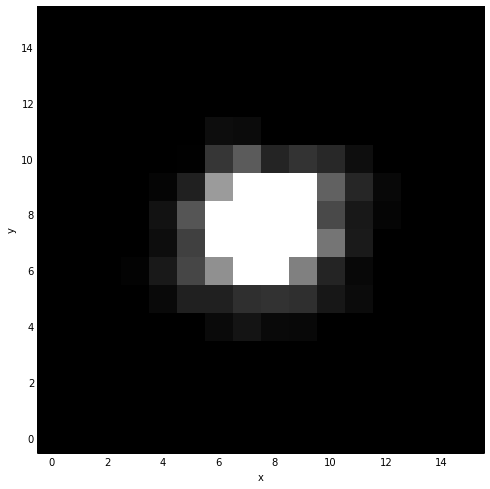

In [9]:
# Test input image, and display to verify location

#psf = fits.getdata('./WEBB_psfs/WEBB_Test_00_3.fits', 1)
psf = fits.getdata('./WEBB_psfs/WEBB_Test_00_7.fits', 1)
#psf = fits.getdata('./WEBB_psfs/WEBB_Test_00_13.fits', 1)
#psf = fits.getdata('./WEBB_psfs/WEBB_Test_90_10.fits', 1)

tu.display_ns_psf(psf, vlim=(0.001, 0.01))

#### Calculate the checkbox region and centroid. Currently testing a checkbox = 5, with max_iterations = 5 and a threshold = 0.0001 pixels.

For this exercise, perform the checkbox calculation...

In [10]:
# Test checkbox piece
cb_cen, cb_hw = jtl.checkbox_2D(psf, 5)

# Checkbox center, in base 1
print('Checkbox Output:')
print('Checkbox center: [{}, {}]'.format(cb_cen[0], cb_cen[1]))
print('Checkbox halfwidths: xhw: {}, yhw: {}'.format(cb_hw[0], cb_hw[1]))
print()

(checkbox_2D): Checkbox not equal to both x/ysize.
Checkbox Output:
Checkbox center: [9, 9]
Checkbox halfwidths: xhw: 5, yhw: 5



Now calculate the centroid based on the checkbox region calculated above...

In [11]:
# Calculate centroid...
cb_centroid, cb_sum = jtl.centroid_2D(psf, cb_cen, cb_hw, max_iter=5, threshold=0.0001, debug=True)
print('Final sum: ', cb_sum)
print()

# ... find the 2nd and 3rd moments...
x_mom, y_mom = jtl.find2D_higher_moments(psf, cb_centroid, cb_hw, cb_sum)
print('Higher moments(2nd, 3rd):')
print('x_moments: ', x_mom)
print('y moments: ', y_mom)
print()

# and verify with previously written (tautils.centroid())
init_cen = tu.centroid(psf, psf.shape[0])
check_centroid = tu.centroid(psf, 7, initial=init_cen)
print('My centroid: ', check_centroid)

(centroid_2D): Init. Sum (before iterations) =  0.902188394205
(centroid_2D): xpeak, ypeak = 9, 9
(centroid_2D): xhw, yhw = 5, 5
(centroid_2D): xcen, ycen = 8.5718499146, 8.48776100211 
(centroid_2D): Centroid = [7.5718499146, 7.48776100211] for num_iter = 3.
(centroid_2D): Converged?  Success
Final sum:  0.905674985153

Higher moments(2nd, 3rd):
x_moments:  [ 1.38571076  0.4873286 ]
y moments:  [ 1.21207993  0.08540995]

My centroid:  (7.6133852529340551, 7.5450015990546824)


#### Display both centroids for comparison...

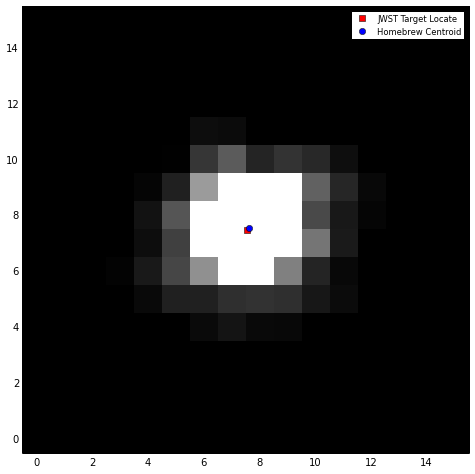

In [12]:
# Plot results for verification
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(psf, vmin=0.001, vmax=0.01, cmap=cm.gray, interpolation='nearest')
ax.autoscale(enable=False, axis='both')

ax.plot(cb_centroid[0], cb_centroid[1], marker='s', mec='black', mfc='red', ls='', label='JWST Target Locate')
ax.plot(check_centroid[0], check_centroid[1], marker='o', mec='black', mfc='blue', ls='', label='Homebrew Centroid')
ax.legend(numpoints=1, loc=1, prop={"size":"small"})

# Save figure for later use
fig.savefig('./TargLocate.pdf')

###3.2 Checkbox calculation on a vector (1D)
Same as above, except on a 1D image. Using the initial psf, we flatten over the y-axis...

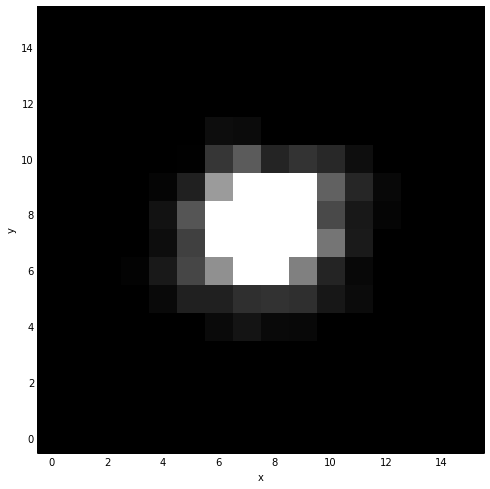

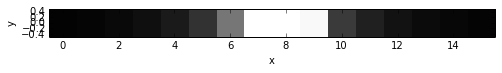

In [13]:
# Test input image
tu.display_ns_psf(psf, vlim=(0.001, 0.01))

vector = np.sum(psf, axis=0).reshape(1, 16)
tu.display_ns_psf(vector, vlim=(0.001, 0.1))

In [14]:
# 1D Checkbox calculation
cb_center, cb_hw = checkbox_1D(psf, 5)

# Print output
print('Checkbox Output:')
print('Checkbox center: {}'.format(cb_center))
print('Checkbox Halfwidth: {}'.format(cb_hw))
print()

# Calculate centroid...
cb_centroid, cb_sum = centroid_1D(vector, cb_center, cb_hw)
print('Final sum: ', cb_sum)
print()

# ... find the 2nd and 3rd moments...
x_mom = find1D_higher_moments(psf, cb_centroid, cb_hw, cb_sum)
print('Higher moments(2nd, 3rd):')
print('x_moments: ', x_mom)
print()

(checkbox_1D): Image collapsed into 1D vector.

(checkbox_1D): Checkbox not equal to xsize.
Checkbox Output:
Checkbox center: 7
Checkbox Halfwidth: 6

(centroid_1D): Sum =  0.918496931466
(centroid_1D): Centroid =  7.46741434088
Final sum:  0.918496931466

Higher moments(2nd, 3rd):
x_moments:  [ 0.04504546 -0.22522728]



#4. Recursive Testing
---

Here, we will perform some recursive testing of the scripts, in particular to determine the  
optimal values for some of the inputs (see JWST-STScI-001117-SM2):

* checkboxSize
* convergenceThres

In [15]:
%matplotlib inline

In [16]:
import numpy as np
from astropy.io import fits
import tautils as tu
import matplotlib.pyplot as plt
import jwst_targloc as jtl
from __future__ import print_function

## Input PSF

**Note**: The current psf, provided by WebbPSF is 16x16 px; this analysis requires 32x32 px (see extractCols  
and extractRows keywords in JWST Cross-Instrument Target Locate document, JWST-STScT-001117, SM-12).  

The following cells below will take the 16x16 psf and implant it into an empty 32x32 black frame. Please  
note that this is an **approximation**, some light will be lost, ~ 7%.  

**The expected center of this psf is (15.5, 15.5) (0.0 is the center of the pixel in Python)**.

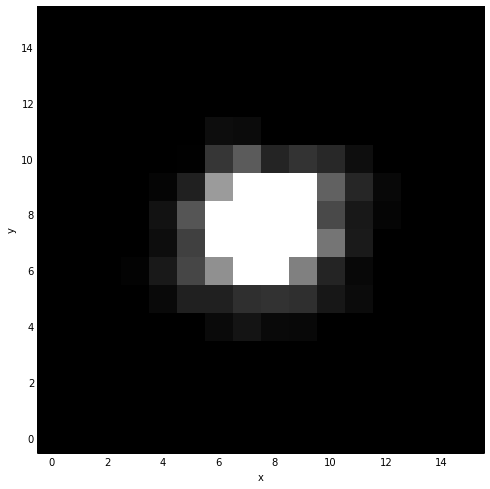

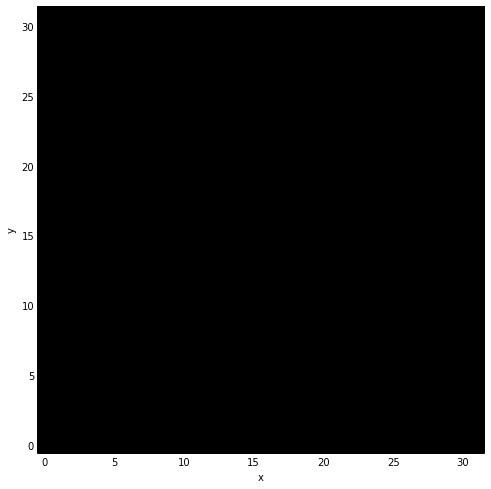

In [17]:
# Read input image, and display to verify location
psf = fits.getdata('./WEBB_psfs/WEBB_Test_00_7.fits', 1)
tu.display_ns_psf(psf, vlim=(0.001, 0.01))

# Create a 32x32 blank image to place the 16x16 psf ...
full_psf = np.zeros([32,32])
tu.display_ns_psf(full_psf, vlim=(0.001, 0.01))

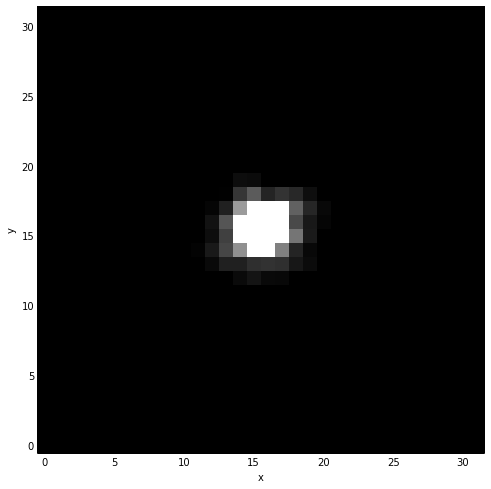

In [18]:
# ...and place psf into blank for the synthetic 32x32 cutout
full_psf[8:24, 8:24] = psf
tu.display_ns_psf(full_psf, vlim=(0.001, 0.01))

**Note**: I wanted to verify the shape of the psf; since the expected centroid turns out to be  
intrapixel (15.5, 15.5), I plotted the rows/columns sorrounding the expected centroid...

&lt;matplotlib.legend.Legend at 0x1126a0dd0&gt;

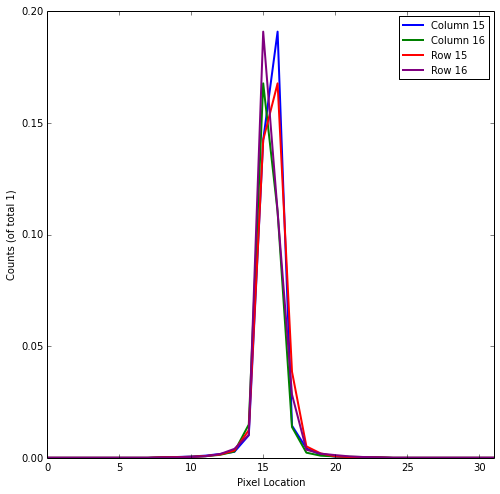

In [19]:
# Plot the rows/columns encompasing the centroid to verify psf shape
x_radial_1 = full_psf[:, 15]
x_radial_2 = full_psf[:, 16]
y_radial_1 = full_psf[15, :]
y_radial_2 = full_psf[16, :]

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xlim(0, 31)
ax.set_xlabel('Pixel Location')
ax.set_ylabel('Counts (of total 1)')

ax.plot(xrange(32), x_radial_1, ls='-', lw=2., label='Column 15')
ax.plot(xrange(32), x_radial_2, ls='-', lw=2., label='Column 16')
ax.plot(xrange(32), y_radial_1, ls='-', lw=2., label='Row 15')
ax.plot(xrange(32), y_radial_2, ls='-', lw=2., color='purple', label='Row 16')

ax.legend(numpoints=1, loc=1, prop={"size":"medium"})

##4.1 checkboxSize
The size of the initial checkbox (in pixels) over which to do an initial (course) centroid. The larger the  
checkbox, the smaller the resulting area over which to do the centroid.

Now that the 32x32 pixels psf is verified, recursively calculate the centroid, changing the checkbox size in each iteration...

**Note**: The output of each iteration is printed, including the calculation of the higher moments.

In [20]:
# Make a list of checkboxes based on width of input image,
# and create an empty list to store centroids based on input 
# checkboxes
psf_width = full_psf.shape[0]
checkbox_list = [x for x in xrange(psf_width) if x % 2 == 1]
num_centroids = len(checkbox_list)
centroids = np.zeros(num_centroids * 2).reshape(num_centroids, 2)

print(full_psf.shape)

# Recursively calculate centroids with input checkbox list
for num, ii in enumerate(checkbox_list[0:-1]):

    # Calculate checkbox and checkbox halfwidth
    cb_cen, cb_hw = jtl.checkbox_2D(full_psf, ii)

    # Calculate centroid and the flux sum (within centroid)...
    cb_centroid, cb_sum = jtl.centroid_2D(full_psf, cb_cen, cb_hw, max_iter=3, threshold=0.3, debug=False)
    centroids[num, 0], centroids[num, 1] = cb_centroid
    
    print('Final sum: ', cb_sum)

    # ... find the 2nd and 3rd moments...
    x_mom, y_mom = jtl.find2D_higher_moments(full_psf, cb_centroid, cb_hw, cb_sum)
    print('Higher moments(2nd, 3rd):')
    print('x_moments: ', x_mom)
    print('y moments: ', y_mom)
    print('---------------------------------------------------------------')
    print()

(32, 32)
(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.69297949]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.69297949]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.6

Same as above, but with max_iterations set to 0...

In [22]:
centroids_mi = np.zeros(num_centroids * 2).reshape(num_centroids, 2)

# Recursively calculate centroids with input checkbox list
for num, ii in enumerate(checkbox_list[0:-1]):

    # Calculate checkbox and checkbox halfwidth
    cb_cen, cb_hw = jtl.checkbox_2D(full_psf, ii)

    # Calculate centroid and the flux sum (within centroid)...
    cb_centroid, cb_sum = jtl.centroid_2D(full_psf, cb_cen, cb_hw, max_iter=0, threshold=0.3, debug=False)
    centroids_mi[num, 0], centroids_mi[num, 1] = cb_centroid
    
    print('Final sum: ', cb_sum)

    # ... find the 2nd and 3rd moments...
    x_mom, y_mom = jtl.find2D_higher_moments(full_psf, cb_centroid, cb_hw, cb_sum)
    print('Higher moments(2nd, 3rd):')
    print('x_moments: ', x_mom)
    print('y moments: ', y_mom)
    print('---------------------------------------------------------------')
    print()

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 0.
(centroid_2D): Converged?  N/A
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.69297949]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 0.
(centroid_2D): Converged?  N/A
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.69297949]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5894637295, 15.4889371105] for num_iter = 0.
(centroid_2D): Converged?  N/A
Final sum:  0.938971026406
Higher moments(2nd, 3rd):
x_moments:  [ 2.76508031  4.88126704]
y moments:  [ 2.37397627  2.69297949]
------------

Along with using the TALocate algorithms, I calculate the centroid on the same psf using my homebrew script (this  
uses a weighted average centroid, which is susceptible to contributions from hot/ward/dead pixels in the centroiding  
vicinity)...

&lt;matplotlib.legend.Legend at 0x111555350&gt;

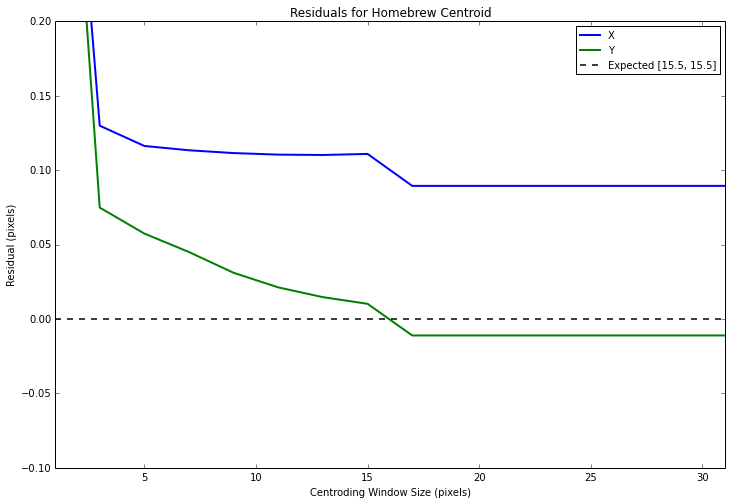

In [23]:
# Compare with previously written (tautils.centroid())

# Empty array to store centroids
num_centroids = len(checkbox_list)
centers = np.zeros(num_centroids * 2).reshape(num_centroids, 2)

# Recursively calculate centroid, changing centroid window
for num, ii in enumerate(checkbox_list):
    init_cen = tu.centroid(full_psf, psf_width)
    check_centroid = tu.centroid(full_psf, ii, initial=init_cen)
    centers[num, 0], centers[num, 1] = check_centroid
    
# Plot residuals
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xlim(1, 31)
ax.set_ylim(-0.1, 0.2)
ax.set_xlabel('Centroding Window Size (pixels)')
ax.set_ylabel('Residual (pixels)')
ax.set_title('Residuals for Homebrew Centroid')

cx_residuals = centers[:, 0] - 15.5
cy_residuals = centers[:, 1] - 15.5

ax.plot(checkbox_list, cx_residuals, lw=2, label='X')
ax.plot(checkbox_list, cy_residuals, lw=2, label='Y')
ax.plot([1, 31],[0., 0.], ls='--', lw=1.5, color='black', label='Expected [15.5, 15.5]')

ax.legend(numpoints=1, loc=1, prop={'size':'medium'})

Now plot the TALocate (w/ and w/o max_iterations) as well as the Homebrew centroids for comparison...

&lt;matplotlib.legend.Legend at 0x113204d10&gt;

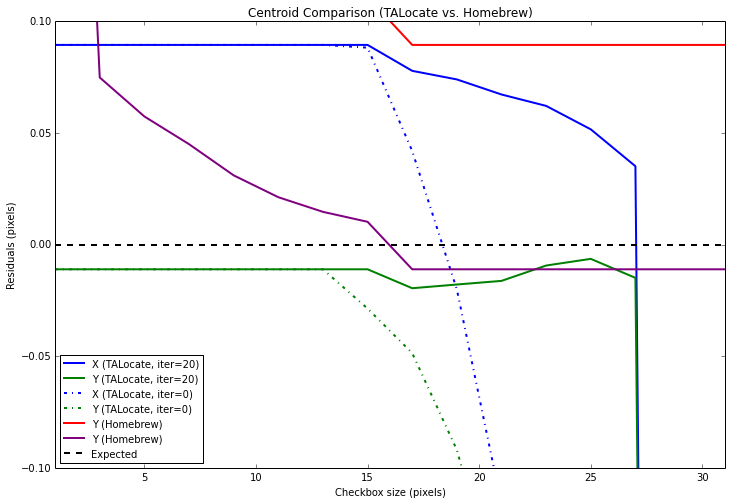

In [24]:
# Residuals
x_residuals = centroids[:, 0] - 15.5
y_residuals = centroids[:, 1] - 15.5
xm_residuals = centroids_mi[:, 0] - 15.5
ym_residuals = centroids_mi[:, 1] - 15.5

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(1, checkbox_list[-1])
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('Checkbox size (pixels)')
ax.set_ylabel('Residuals (pixels)')
ax.set_title('Centroid Comparison (TALocate vs. Homebrew)')

ax.plot(checkbox_list, x_residuals, lw=2, color='blue', label='X (TALocate, iter=20)')
ax.plot(checkbox_list, y_residuals, lw=2, color='green', label='Y (TALocate, iter=20)')
ax.plot(checkbox_list, xm_residuals, lw=2, ls='-.', color='blue', label='X (TALocate, iter=0)')
ax.plot(checkbox_list, ym_residuals, lw=2, ls='-.', color='green', label='Y (TALocate, iter=0)')
ax.plot(checkbox_list, cx_residuals, lw=2, color='red', label='Y (Homebrew)')
ax.plot(checkbox_list, cy_residuals, lw=2, color='purple', label='Y (Homebrew)')
ax.plot((checkbox_list[0], checkbox_list[-1]), (0., 0.), ls='--', lw=2, color='black', label='Expected')

ax.legend(numpoints=1, loc=0, prop={"size":"medium"})

##4.2 convergenceThres
The convergence threshold for the centroid calculation iterations. Ignored if maxIterations = 0.

In [25]:
threshold = [1./(10**x) for x in xrange(10)]
threshold

[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]

In [26]:
#Same iterations as 5.1, but testing threshold
num_centroids = len(threshold)
centroids_th = np.zeros(num_centroids * 2).reshape(num_centroids, 2)

# Recursively calculate centroids with input checkbox list
for num, ii in enumerate(threshold):

    # Calculate checkbox and checkbox halfwidth
    cb_cen, cb_hw = jtl.checkbox_2D(full_psf, 25)

    # Calculate centroid and the flux sum (within centroid)...
    cb_centroid, cb_sum = jtl.centroid_2D(full_psf, cb_cen, cb_hw-1, max_iter=20, threshold=ii, debug=False)
    centroids_th[num, 0], centroids_th[num, 1] = cb_centroid
    
    print('Final sum: ', cb_sum)

    # ... find the 2nd and 3rd moments...
    x_mom, y_mom = jtl.find2D_higher_moments(full_psf, cb_centroid, cb_hw, cb_sum)
    print('Higher moments(2nd, 3rd):')
    print('x_moments: ', x_mom)
    print('y moments: ', y_mom)
    print('---------------------------------------------------------------')
    print()

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [12.0467345501, 12.9023407472] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  0.0169573829019
Higher moments(2nd, 3rd):
x_moments:  [ 1.24323475 -2.16266872]
y moments:  [ 1.33293123 -2.26287254]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5444878936, 15.4904034764] for num_iter = 7.
(centroid_2D): Converged?  Success
Final sum:  0.798280125261
Higher moments(2nd, 3rd):
x_moments:  [ 0.56086779 -0.04379718]
y moments:  [ 0.56606781  0.03841845]
---------------------------------------------------------------

(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.5444878936, 15.4904034764] for num_iter = 7.
(centroid_2D): Converged?  Success
Final sum:  0.798280125261
Higher moments(2nd, 3rd):
x_moments:  [ 0.56086779 -0.04379718]
y moments:  [ 0.56606781  0.03841845]

The threshold does not really matter until the checkbox size is significant (in comparison to the image size). Ony when the checkbox size approaches the size of the image, does the threshold matter (and hence the iterations).

#4.3 Recursive Testing, Take 2

In an eefort to truly test the Python written scripts, I will use simulated pinhole psf from NIRSpec FM2 tests...

In [27]:
from astropy.io import fits
import numpy as np
import tautils as tu
import matplotlib.pyplot as plt
import jwst_targloc as jtl
from __future__ import print_function
%matplotlib inline

In [28]:
# Test data with 
fits.info('./data/TEST1_491_IM_MIR_CLEAR_PHM.fits') 

Filename: ./data/TEST1_491_IM_MIR_CLEAR_PHM.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      78   (2048, 2048, 5)   int16   


In [29]:
testpsf = fits.getdata('./data/TEST1_491_IM_MIR_CLEAR_PHM.fits')
testpsf.shape

(5, 2048, 2048)

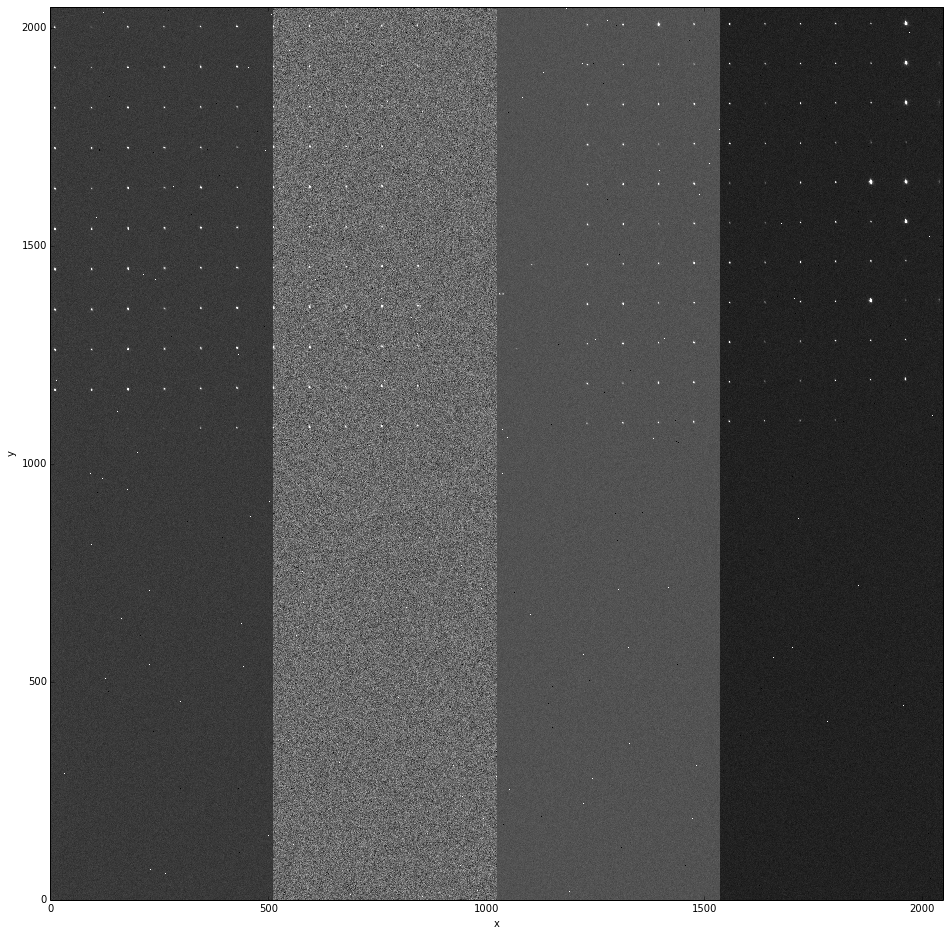

In [30]:
tu.display_ns_psf(testpsf[0, :, :], fsize=(16, 16), vlim=(6000, 10000))

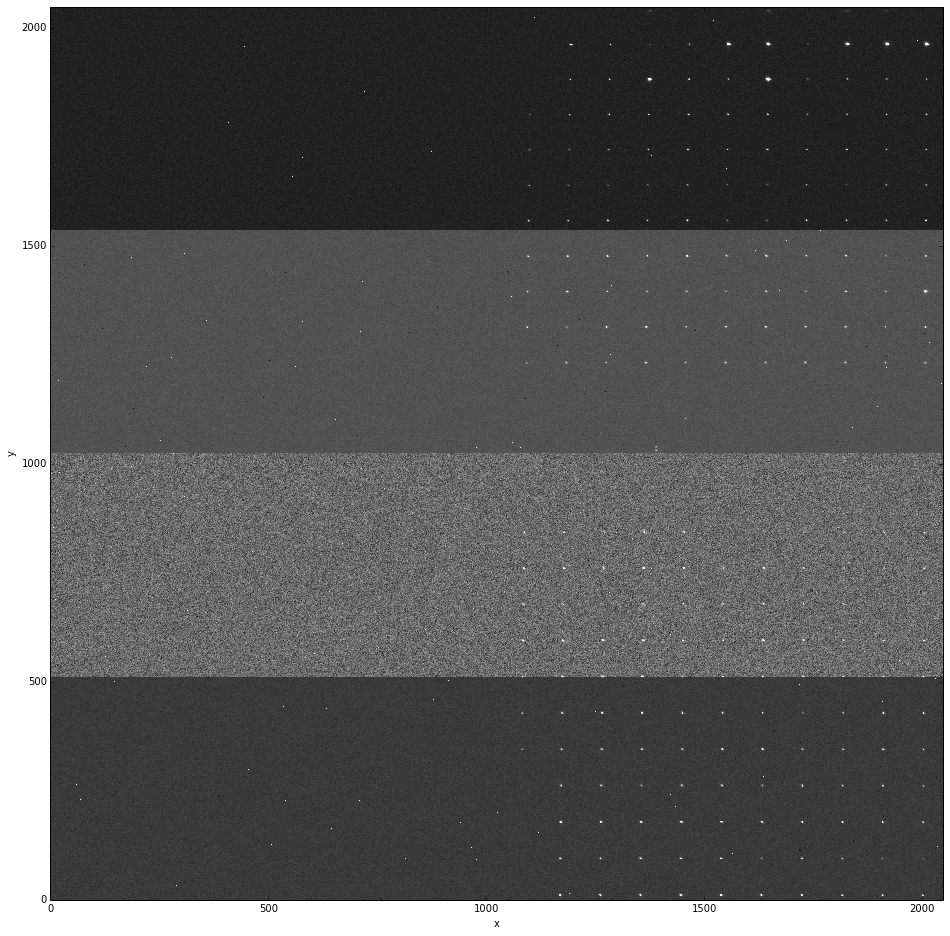

In [31]:
#Rotated and flipped for NIRSpec output (rotated 90 and flipped up/down)
rot_psf = np.rot90(testpsf[0, :, :])
corrected_psf = np.flipud(rot_psf)
tu.display_ns_psf(corrected_psf, fsize=(16, 16), vlim=(6000, 10000))

In [32]:
# Calculate lower/upper limits given a [x, y] pair...
def getlimits(inputCoord):
    import numpy as np
    
    limits = np.array([inputCoord - 16, inputCoord + 16])
    return limits

In [33]:
# Candidate sample, one in each readout circuit (to test the effect of variances on centroiding)...
samples = np.array([[1447,  345],
                   [1451,  760],
                   [1456, 1231],
                   [1460, 1638]])

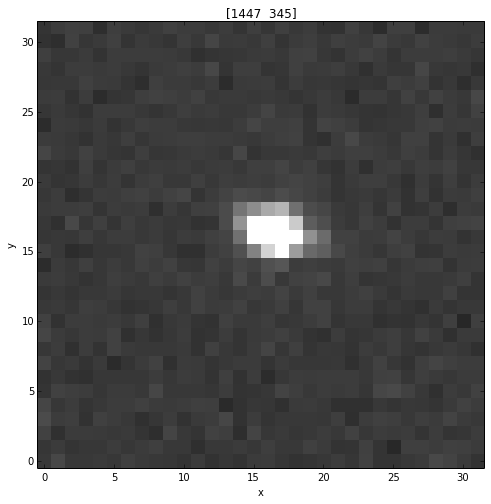

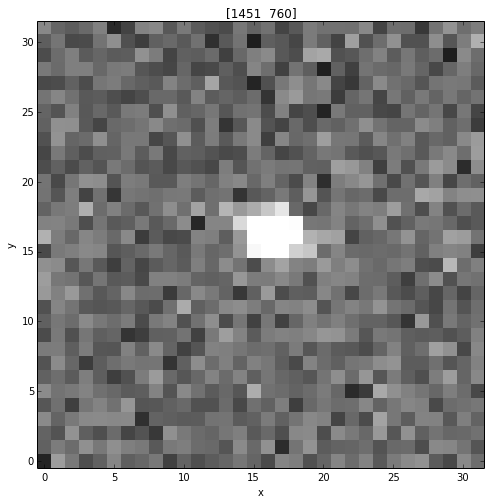

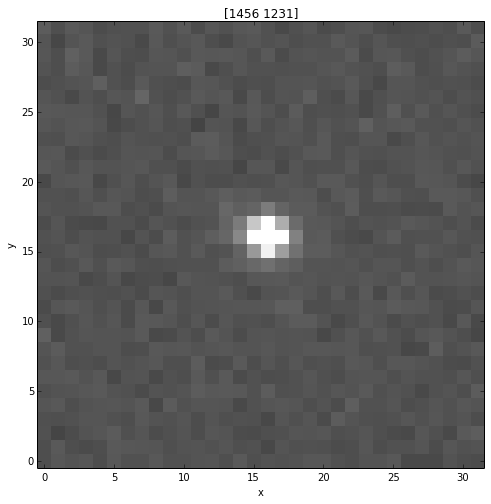

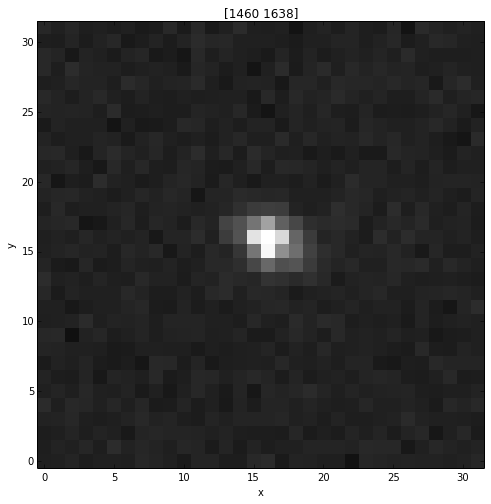

In [34]:
# Master sample array
masterSample = np.zeros(4*32*32).reshape(4, 32, 32)
ii = 0

# Display each of the 4 samples; store samples in one array for recursive tests...
for x, y in samples:
    xl, xu = getlimits(x)
    yl, yu = getlimits(y)

    tu.display_ns_psf(corrected_psf[yl:yu, xl:xu], vlim=(6000, 10000), title=str(samples[ii]))
    masterSample[ii, :, :] = corrected_psf[yl:yu, xl:xu]
    ii += 1

Assuming that the profile is psf-like (as in 5.1 above), let's proceed with the tests...

###4.3.1 checkboxSize

In [35]:
reload(jtl)

(jwst_targloc): JWST Target Locate Utilities Version 1.0.1 loaded!


&lt;module 'jwst_targloc' from '/Users/leblanc/py-lib/jwst_targloc.pyc'&gt;

In [36]:
# Make a list of checkboxes based on width of input image,
# and create an empty list to store centroids based on input 
# checkboxes


checkbox_list = [x for x in xrange(psf_width) if x % 2 == 1]
num_centroids = len(checkbox_list)

mm = masterSample.shape[0]
print(mm)
centroids = np.zeros(mm * num_centroids * 2).reshape(mm, num_centroids, 2)

for mm in xrange(masterSample.shape[0]):
    psf = masterSample[mm, :, :]
    psf_width = psf.shape[0]

    # Recursively calculate centroids with input checkbox list
    for num, ii in enumerate(checkbox_list[0:-1]):

        print('Checkbox size: ', ii) 
        # Calculate checkbox and checkbox halfwidth
        cb_cen, cb_hw = jtl.checkbox_2D(psf, ii)

        # Calculate centroid and the flux sum (within centroid)...
        cb_centroid, cb_sum = jtl.centroid_2D(psf, cb_cen, cb_hw, max_iter=20, threshold=0.3, debug=False)
        centroids[mm, num, 0], centroids[mm, num, 1] = cb_centroid
    
        print('Final sum: ', cb_sum)

        # ... find the 2nd and 3rd moments...
        x_mom, y_mom = jtl.find2D_higher_moments(psf, cb_centroid, cb_hw, cb_sum)
        print('Higher moments(2nd, 3rd):')
        print('x_moments: ', x_mom)
        print('y moments: ', y_mom)
        print('---------------------------------------------------------------')
        print()

4
Checkbox size:  1
(checkbox_2D): Checkbox not equal to both x/ysize.
(checkbox_2D): WARNING - Peak too close to edge of image.
(centroid_2D): Centroid = [16.2569423445, 15.275901129] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  6511574.93012
Higher moments(2nd, 3rd):
x_moments:  [  63.35661164 -187.37376089]
y moments:  [  63.37549263 -187.75592574]
---------------------------------------------------------------

Checkbox size:  3
(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.2813342359, 15.2779209825] for num_iter = 1.
(centroid_2D): Converged?  Success
Final sum:  5692933.13593
Higher moments(2nd, 3rd):
x_moments:  [  54.58197077 -160.93160768]
y moments:  [  54.57049514 -161.34486109]
---------------------------------------------------------------

Checkbox size:  5
(checkbox_2D): Checkbox not equal to both x/ysize.
(centroid_2D): Centroid = [15.2805727086, 15.2824327382] for num_iter = 1.
(centroid_2D): Converged?  Success
Fi

&lt;matplotlib.legend.Legend at 0x11325a450&gt;

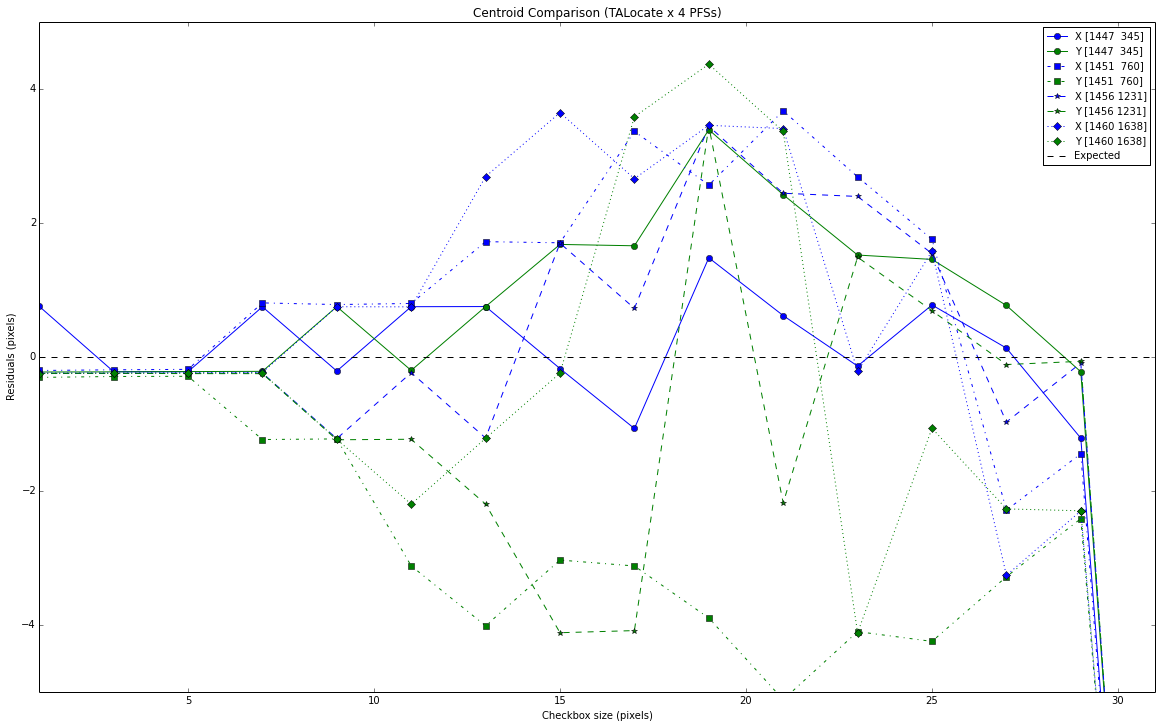

In [37]:
# Linestyles
lst = ['-', '-.', '--', ':']
mr = ['o', 's', '*', 'D']

fig, ax = plt.subplots(figsize=(20, 12))
ax.set_xlim(1, checkbox_list[-1])
ax.set_ylim(-5, 5)
ax.set_xlabel('Checkbox size (pixels)')
ax.set_ylabel('Residuals (pixels)')
ax.set_title('Centroid Comparison (TALocate x 4 PFSs)')

for mm in xrange(centroids.shape[0]):
    
    # Residuals
    x_residuals = centroids[mm, :, 0] - 15.5
    y_residuals = centroids[mm, :, 1] - 15.5

#    ax.plot(checkbox_list, x_residuals, lw=1, ls=lst[mm], color='blue', label='X ' + str(samples[mm]))
#    ax.plot(checkbox_list, y_residuals, lw=1, ls=lst[mm], color='green', label='Y ' + str(samples[mm]))
    ax.plot(checkbox_list, x_residuals, marker=mr[mm], ls=lst[mm], color='blue', label='X ' + str(samples[mm]))
    ax.plot(checkbox_list, y_residuals, marker=mr[mm], ls=lst[mm], color='green', label='Y ' + str(samples[mm]))


ax.plot((checkbox_list[0], checkbox_list[-1]), (0., 0.), ls='--', lw=1, color='black', label='Expected')
ax.legend(numpoints=1, loc=0, prop={"size":"medium"})